In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()

In [7]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Convert the scaled data back into a DataFrame
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
crypto_names = df_market_data.index

# Set the coinid column as index
df_market_data_scaled.index = df_market_data.index

# Create a DataFrame with the scaled data
df_scaled_with_names = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

# Display sample data
df_scaled_with_names.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [8]:
# Create a list with the number of k-values from 1 to 11
k_values = [i for i in range(1, 12)]

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [9]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)




C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_km

[287.0, 195.82021818036043, 123.19048183836959, 79.02243535120975, 65.302379141625, 54.7399219421002, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


In [10]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow_curve)

    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       54.739922
6          7       43.481606
7          8       37.517032
8          9       32.591891
9         10       28.222899
10        11       24.116198


In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow_curve.hvplot.line(x='k_values', y='inertia_values', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Curve')


:Curve   [k_values]   (inertia_values)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
kmeans_best = KMeans(n_clusters=4, random_state=42)


In [13]:
# Fit the K-Means model using the scaled data
kmeans_best.fit(df_market_data_scaled)


C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_best.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [15]:
# Create a copy of the DataFrame

df_copy = df_market_data.copy()



In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_clusters'] = cluster_labels

# Display sample data
print(df_copy.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [17]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_clusters",
    hover_cols=["coin_name"],
    title="Cryptocurrency Price Change",
    xlabel="Price Change (%) in 24 hours",
    ylabel="Price Change (%) in 7 days"
)

# Display the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
# Create a PCA model instance and set `n_components=3`.

pca = PCA(n_components=3)


In [19]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 


# Fit and transform the data using PCA to reduce to three principal components
pca_features = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame with the transformed features
df_pca = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)

# View the first five rows of the DataFrame
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [20]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
# Retrieve the explained variance from the PCA model
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f"Explained Variance for PC{i+1}: {variance:.2f}")


Explained Variance for PC1: 0.37
Explained Variance for PC2: 0.35
Explained Variance for PC3: 0.18


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal componenets would be 90

In [21]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

crypto_names = df_market_data.index

# Set the coinid column as index

df_pca.index = crypto_names

# Display sample data

print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [22]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [23]:
# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans.fit(df_market_data)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_km

In [24]:
# Create a dictionary with the data to plot the Elbow curve

elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve

df_elbow = pd.DataFrame(elbow_data)

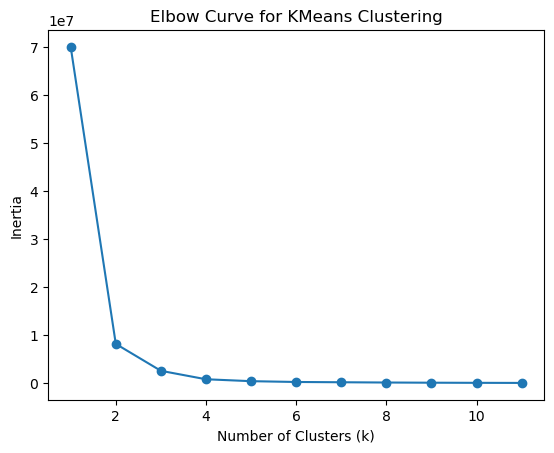

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the Elbow curve
plt.plot(df_elbow['k_values'], df_elbow['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k

k = 2
kmeans = KMeans(n_clusters=k, random_state=42)


In [27]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca)


C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\coleo\anaconda3\anaconda3 final\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(df_pca)
# Print the resulting array of cluster values.
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 1 1]


In [29]:
# Create a copy of the DataFrame with the PCA data
df_clustered = df_pca.copy()

# Add a new column with the predicted clusters
df_clustered['Cluster'] = clusters

# Display sample data
print(df_clustered.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        1
ethereum     -0.458261  0.458466  0.952877        1
tether       -0.433070 -0.168126 -0.641752        1
ripple       -0.471835 -0.222660 -0.479053        1
bitcoin-cash -1.157800  2.041209  1.859715        1


In [30]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot = df_clustered.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='Cluster',
    hover_cols=['coin_id']
)

# Show the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [32]:
# Composite plot to contrast the Elbow curves


# Plot Elbow curve for optimized K-means

import pandas as pd
import hvplot.pandas
import holoviews as hv

# Original Data Elbow Curve
elbow_data_original = {
    'k_values': k_values,
    'inertia_values_original': inertia_values
}
df_elbow_curve_original = pd.DataFrame(elbow_data_original)

# PCA Data Elbow Curve
elbow_data_pca = {
    'k_values': k_values,
    'inertia_values_pca': inertia_values
}
df_elbow_curve_pca = pd.DataFrame(elbow_data_pca)

# Plot Elbow Curves
elbow_curve_original = df_elbow_curve_original.hvplot.line(x='k_values', y='inertia_values_original', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Curve (Original Data)')
elbow_curve_pca = df_elbow_curve_pca.hvplot.line(x='k_values', y='inertia_values_pca', xlabel='Number of Clusters (k)', ylabel='Inertia', title='Elbow Curve (PCA Data)')

# Composite Plot for Elbow Curves
composite_elbow_curve = (elbow_curve_original + elbow_curve_pca).opts(legend_position='right', title='Elbow Curve Comparison')

# Display Composite Plot for Elbow Curves
composite_elbow_curve



:Layout
   .Curve.I  :Curve   [k_values]   (inertia_values_original)
   .Curve.II :Curve   [k_values]   (inertia_values_pca)

In [31]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  
  
The composite plot comparing the elbow curves generated from the original data and the PCA data suggests that there is no significant difference between the two. Both curves exhibit similar patterns, indicating that the optimal number of clusters remains consistent regardless of the dimensionality reduction technique used.